### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [4]:
df.describe(include="all")

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,502,NaN,5,5,1426,3031,2813,3046
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [6]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [7]:
pd.get_dummies(df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
2202,False,True,False,False,False
3117,False,True,False,False,False
1146,False,True,False,False,False
3947,False,False,False,True,False
1951,False,False,False,True,False
...,...,...,...,...,...
1039,False,True,False,False,False
3281,False,False,True,False,False
1664,False,False,False,True,False
2621,True,False,False,False,False


In [8]:
df2=df.copy()

In [9]:
df2 = df2[["effectiveness","sideEffects","rating"]]
df2 = pd.get_dummies(df2[["effectiveness","sideEffects","rating"]])
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
datos_scal = scaler.fit_transform(df2)
#datos_scal = df2.values


In [10]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [11]:
my_effectiveness = {
    "Ineffective": 0,
    "Marginally Effective": 1,
    "Moderately Effective": 2,
    "Considerably Effective": 3,
    "Highly Effective": 4
}

df['effectiveness_int'] = df['effectiveness'].map(my_effectiveness)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [12]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [13]:
my_sideEffects = {
    "No Side Effects": 0,
    "Mild Side Effects": 1,
    "Moderate Side Effects": 2,
    "Severe Side Effects": 3,
    "Extremely Severe Side Effects": 4
}

df['sideEffects_int'] = df['sideEffects'].map(my_sideEffects)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


In [14]:
X = df[['rating', "effectiveness_int", "sideEffects_int"]]
print(X.shape)

(3107, 3)


In [15]:
X.describe()

,rating,effectiveness_int,sideEffects_int
count,3107.000000,3107.000000,3107.000000
mean,7.006115,2.935629,1.304796
std,2.937582,1.230531,1.177482
min,1.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000
50%,8.000000,3.000000,1.000000
75%,9.000000,4.000000,2.000000
max,10.000000,4.000000,4.000000


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [17]:
km_list = [KMeans(n_clusters=k, n_init=10, random_state=10).fit(X) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, n_init=10, random_state=10),
 KMeans(n_clusters=3, n_init=10, random_state=10),
 KMeans(n_clusters=4, n_init=10, random_state=10),
 KMeans(n_clusters=5, n_init=10, random_state=10),
 KMeans(n_clusters=6, n_init=10, random_state=10),
 KMeans(n_clusters=7, n_init=10, random_state=10),
 KMeans(n_init=10, random_state=10),
 KMeans(n_clusters=9, n_init=10, random_state=10),
 KMeans(n_clusters=10, n_init=10, random_state=10),
 KMeans(n_clusters=11, n_init=10, random_state=10),
 KMeans(n_clusters=12, n_init=10, random_state=10),
 KMeans(n_clusters=13, n_init=10, random_state=10),
 KMeans(n_clusters=14, n_init=10, random_state=10),
 KMeans(n_clusters=15, n_init=10, random_state=10),
 KMeans(n_clusters=16, n_init=10, random_state=10),
 KMeans(n_clusters=17, n_init=10, random_state=10),
 KMeans(n_clusters=18, n_init=10, random_state=10),
 KMeans(n_clusters=19, n_init=10, random_state=10),
 KMeans(n_clusters=20, n_init=10, random_state=10),
 KMeans(n_clusters=21, n_init=10, 

In [18]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
silhouette_score_list

[np.float64(0.6190969508782411),
 np.float64(0.4541665291694327),
 np.float64(0.416701237123931),
 np.float64(0.4152173517501398),
 np.float64(0.4023764724520682),
 np.float64(0.40557580829247497),
 np.float64(0.3867321491862528),
 np.float64(0.4031908327501373),
 np.float64(0.40546081621775343),
 np.float64(0.418564395282399),
 np.float64(0.4209951052127568),
 np.float64(0.42472767802639305),
 np.float64(0.44422026666347153),
 np.float64(0.45321061939472584),
 np.float64(0.4753626098033833),
 np.float64(0.5238076296330578),
 np.float64(0.5109596642665494),
 np.float64(0.4859662106692393),
 np.float64(0.5228878403066904),
 np.float64(0.531607509306112),
 np.float64(0.5315322660374614),
 np.float64(0.5457629738673985),
 np.float64(0.5450085706358424),
 np.float64(0.5907873581539258),
 np.float64(0.5997424227195615),
 np.float64(0.6002131744283817),
 np.float64(0.5975645913474263),
 np.float64(0.605096781106952)]

In [19]:
print(X.shape)

(3107, 3)


In [20]:
km_list[0].labels_

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

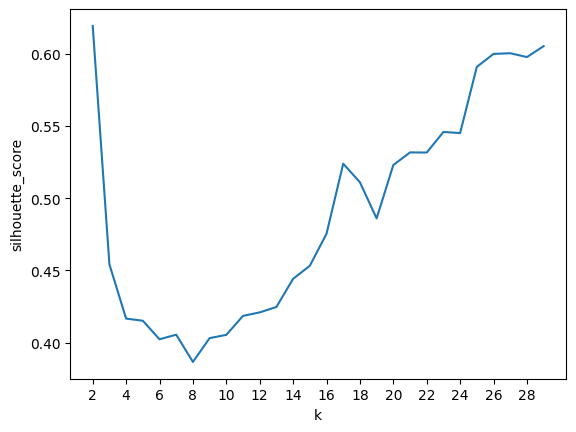

In [21]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel("k")
plt.ylabel("silhouette_score")
plt.xticks(range(2,30,2));

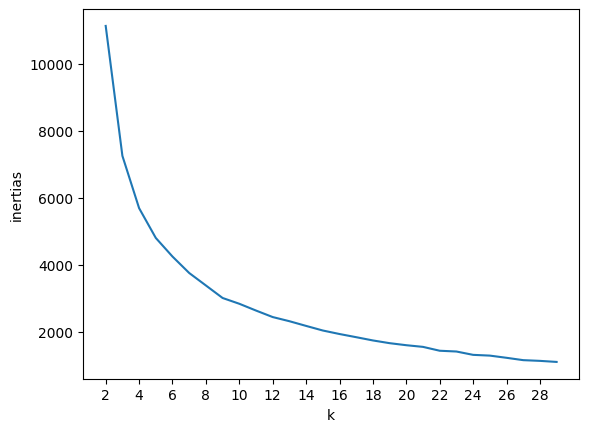

In [22]:
inertias = [model.inertia_ for model in km_list]
plt.plot(range(2,30), inertias)
plt.xlabel("k")
plt.ylabel("inertias")
plt.xticks(range(2,30,2));

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [23]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=10).fit(X)
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

In [24]:
df_cluster = X.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster

,rating,effectiveness_int,sideEffects_int,cluster
2202,4,4,1,0
3117,1,4,3,0
1146,10,4,0,1
3947,3,1,1,0
1951,2,1,3,0
...,...,...,...,...
1039,10,4,1,1
3281,1,0,4,0
1664,2,1,2,0
2621,8,3,1,1


In [25]:
df_cluster['cluster'].value_counts()

cluster
1    2284
0     823
Name: count, dtype: int64

<Axes: ylabel='count'>

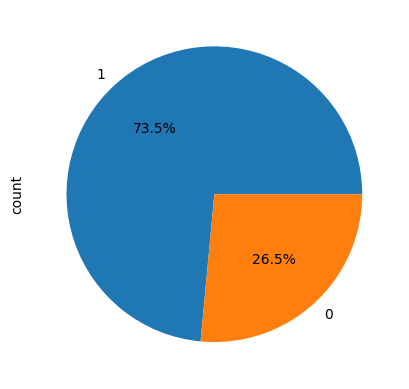

In [26]:
df_cluster['cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [27]:
pd.set_option("display.max_columns", 100)

In [28]:
df_cluster.groupby("cluster").describe()

rating                                                 \
          count      mean       std  min  25%  50%   75%   max   
cluster                                                          
0         823.0  2.667072  1.570244  1.0  1.0  3.0   4.0   6.0   
1        2284.0  8.569615  1.272701  5.0  8.0  9.0  10.0  10.0   

        effectiveness_int                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster                                                                  
0                   823.0  1.584447  1.356197  0.0  0.0  1.0  3.0  4.0   
1                  2284.0  3.422504  0.708896  1.0  3.0  4.0  4.0  4.0   

        sideEffects_int                                               
                  count      mean       std  min  25%  50%  75%  max  
cluster                                                               
0                 823.0  2.482382  1.182545  0.0  2.0  3.0  3.0  4.0  
1                2284.0  0.880473  0.838299  0.0  0.0  1.0  1.0  4.0

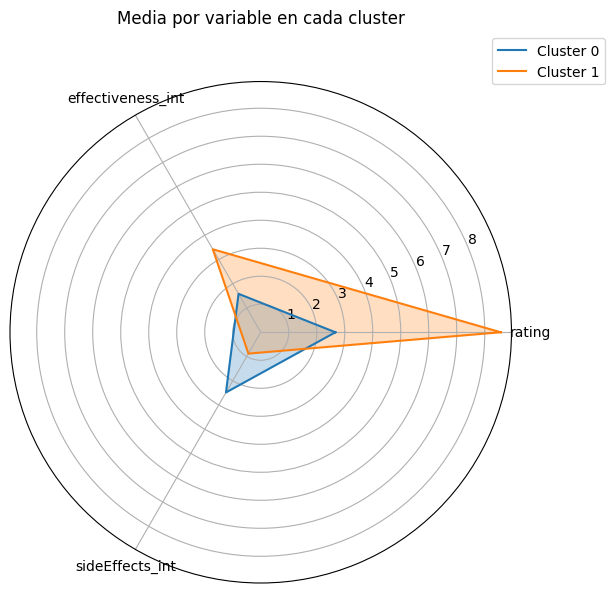

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtener las medias por cluster
df_mean = df_cluster.groupby("cluster").mean()

# Variables (columnas) numéricas a incluir
variables = df_mean.columns.tolist()
n_vars = len(variables)

# Ángulos para cada eje en el radar chart
angles = np.linspace(0, 2 * np.pi, n_vars, endpoint=False).tolist()
angles += angles[:1]  # Para cerrar el círculo

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Graficar cada cluster
for idx, row in df_mean.iterrows():
    values = row.tolist()
    values += values[:1]  # Para cerrar el círculo
    ax.plot(angles, values, label=f'Cluster {idx}')
    ax.fill(angles, values, alpha=0.25)

# Configurar los ejes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)
ax.set_title("Media por variable en cada cluster", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

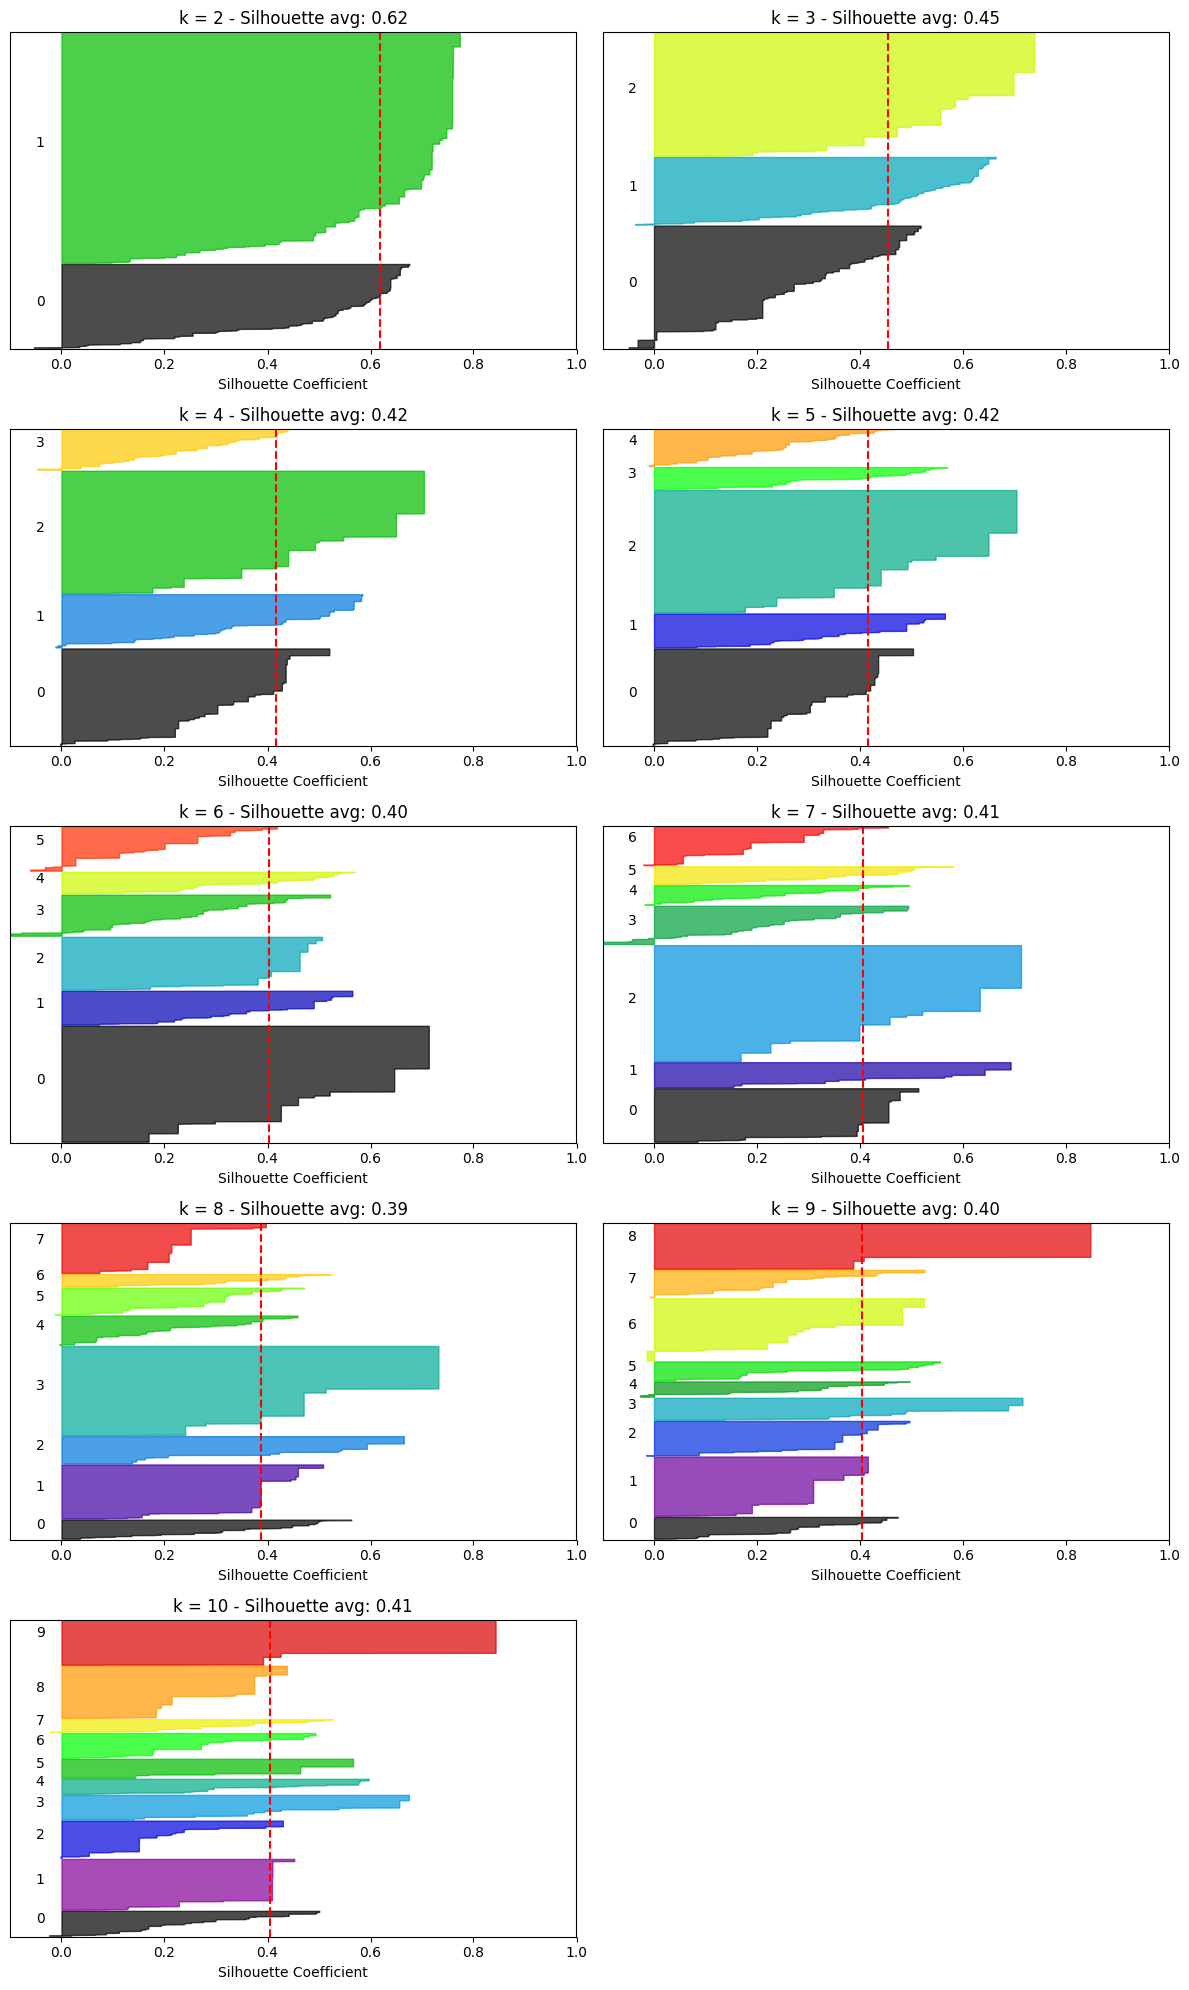

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Configurar figura
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i, k in enumerate(range(2, 11)):
    ax = axes[i]
    kmeans = km_list[i]  # Asegúrate de que km_list[0] corresponde a k=2, etc.
    labels = kmeans.labels_
    
    # Valores de silhouette por muestra
    silhouette_vals = silhouette_samples(X, labels)
    silhouette_avg = silhouette_score(X, labels)
    y_lower = 10

    # Para cada cluster
    for cluster in range(k):
        cluster_sil_vals = silhouette_vals[labels == cluster]
        cluster_sil_vals.sort()
        size = len(cluster_sil_vals)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(cluster) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size, str(cluster))
        y_lower = y_upper + 10  # espacio entre clusters

    ax.axvline(silhouette_avg, color="red", linestyle="--")
    ax.set_title(f'k = {k} - Silhouette avg: {silhouette_avg:.2f}')
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X)])
    ax.set_yticks([])
    ax.set_xlabel("Silhouette Coefficient")

# Eliminar el último subplot si sobra (en caso de número impar)
if len(axes) > 9:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=10).fit(X)
kmeans.labels_

array([3, 1, 2, ..., 1, 0, 3], dtype=int32)

In [32]:
df_cluster = X.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster

,rating,effectiveness_int,sideEffects_int,cluster
2202,4,4,1,3
3117,1,4,3,1
1146,10,4,0,2
3947,3,1,1,1
1951,2,1,3,1
...,...,...,...,...
1039,10,4,1,2
3281,1,0,4,1
1664,2,1,2,1
2621,8,3,1,0


In [33]:
df_cluster.groupby("cluster").describe()

rating                                                  \
          count      mean       std  min  25%   50%   75%   max   
cluster                                                           
0         946.0  7.614165  0.567339  6.0  7.0   8.0   8.0  10.0   
1         523.0  1.636711  0.819979  1.0  1.0   1.0   2.0   3.0   
2        1202.0  9.616473  0.486447  9.0  9.0  10.0  10.0  10.0   
3         436.0  4.931193  0.919690  3.0  4.0   5.0   6.0   6.0   

        effectiveness_int                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster                                                                  
0                   946.0  3.102537  0.683172  1.0  3.0  3.0  4.0  4.0   
1                   523.0  1.217973  1.361169  0.0  0.0  1.0  2.0  4.0   
2                  1202.0  3.796173  0.415221  2.0  4.0  4.0  4.0  4.0   
3                   436.0  2.261468  0.994459  0.0  2.0  2.0  3.0  4.0   

        sideEffects_int                                               
                  count      mean       std  min  25%  50%  75%  max  
cluster                                                               
0                 946.0  1.226216  0.861640  0.0  1.0  1.0  2.0  4.0  
1                 523.0  2.831740  1.127158  0.0  2.0  3.0  4.0  4.0  
2                1202.0  0.556572  0.663459  0.0  0.0  0.0  1.0  4.0  
3                 436.0  1.706422  1.010772  0.0  1.0  2.0  2.0  4.0

### OneHotEncoding

In [34]:
df2

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,False,True,False,False,False,False,True,False,False,False
3117,1,False,True,False,False,False,False,False,False,False,True
1146,10,False,True,False,False,False,False,False,False,True,False
3947,3,False,False,False,True,False,False,True,False,False,False
1951,2,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1039,10,False,True,False,False,False,False,True,False,False,False
3281,1,False,False,True,False,False,True,False,False,False,False
1664,2,False,False,False,True,False,False,False,True,False,False
2621,8,True,False,False,False,False,False,True,False,False,False


In [35]:
datos_scal_df = pd.DataFrame(datos_scal,columns=df2.columns)
datos_scal_df.round(2)

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,-1.02,-0.65,1.16,-0.29,-0.25,-0.39,-0.24,1.43,-0.50,-0.65,-0.37
1,-2.04,-0.65,1.16,-0.29,-0.25,-0.39,-0.24,-0.70,-0.50,-0.65,2.72
2,1.02,-0.65,1.16,-0.29,-0.25,-0.39,-0.24,-0.70,-0.50,1.53,-0.37
3,-1.36,-0.65,-0.87,-0.29,3.95,-0.39,-0.24,1.43,-0.50,-0.65,-0.37
4,-1.70,-0.65,-0.87,-0.29,3.95,-0.39,-0.24,-0.70,-0.50,-0.65,2.72
...,...,...,...,...,...,...,...,...,...,...,...
3102,1.02,-0.65,1.16,-0.29,-0.25,-0.39,-0.24,1.43,-0.50,-0.65,-0.37
3103,-2.04,-0.65,-0.87,3.40,-0.25,-0.39,4.09,-0.70,-0.50,-0.65,-0.37
3104,-1.70,-0.65,-0.87,-0.29,3.95,-0.39,-0.24,-0.70,2.02,-0.65,-0.37
3105,0.34,1.53,-0.87,-0.29,-0.25,-0.39,-0.24,1.43,-0.50,-0.65,-0.37


In [36]:
km_list = [KMeans(n_clusters=k, n_init=10, random_state=10).fit(datos_scal) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, n_init=10, random_state=10),
 KMeans(n_clusters=3, n_init=10, random_state=10),
 KMeans(n_clusters=4, n_init=10, random_state=10),
 KMeans(n_clusters=5, n_init=10, random_state=10),
 KMeans(n_clusters=6, n_init=10, random_state=10),
 KMeans(n_clusters=7, n_init=10, random_state=10),
 KMeans(n_init=10, random_state=10),
 KMeans(n_clusters=9, n_init=10, random_state=10),
 KMeans(n_clusters=10, n_init=10, random_state=10),
 KMeans(n_clusters=11, n_init=10, random_state=10),
 KMeans(n_clusters=12, n_init=10, random_state=10),
 KMeans(n_clusters=13, n_init=10, random_state=10),
 KMeans(n_clusters=14, n_init=10, random_state=10),
 KMeans(n_clusters=15, n_init=10, random_state=10),
 KMeans(n_clusters=16, n_init=10, random_state=10),
 KMeans(n_clusters=17, n_init=10, random_state=10),
 KMeans(n_clusters=18, n_init=10, random_state=10),
 KMeans(n_clusters=19, n_init=10, random_state=10),
 KMeans(n_clusters=20, n_init=10, random_state=10),
 KMeans(n_clusters=21, n_init=10, 

In [37]:
silhouette_score_list = [silhouette_score(datos_scal, model.labels_) for model in km_list]
silhouette_score_list

[np.float64(0.29052611632857206),
 np.float64(0.2678548782999719),
 np.float64(0.34912407748883934),
 np.float64(0.4096063478602783),
 np.float64(0.43375379271215475),
 np.float64(0.4752914789220622),
 np.float64(0.5184696990216848),
 np.float64(0.5771138294398981),
 np.float64(0.6622064043837825),
 np.float64(0.7080792621726718),
 np.float64(0.7337376647960951),
 np.float64(0.7473142676287466),
 np.float64(0.7625744247001219),
 np.float64(0.7754390314609649),
 np.float64(0.782378030742242),
 np.float64(0.7966295469281882),
 np.float64(0.8199796171781087),
 np.float64(0.826552829076003),
 np.float64(0.8343543001573624),
 np.float64(0.8420961057656462),
 np.float64(0.8471657310964708),
 np.float64(0.8555413852563987),
 np.float64(0.8610312974001184),
 np.float64(0.8670911485246627),
 np.float64(0.8581061774195711),
 np.float64(0.8586180440323966),
 np.float64(0.8271584073012676),
 np.float64(0.8219915923958878)]

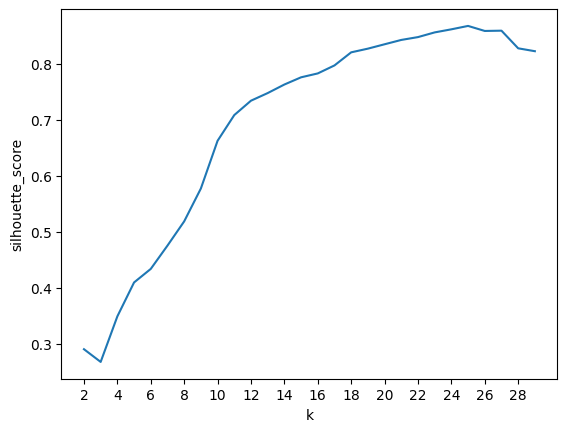

In [38]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel("k")
plt.ylabel("silhouette_score")
plt.xticks(range(2,30,2));

In [39]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=10).fit(datos_scal)
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [40]:
datos = scaler.inverse_transform(datos_scal)

In [41]:
#df_cluster = X.copy()
#datos['cluster'] = kmeans.labels_
datos

array([[ 4.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  1.],
       [10.,  0.,  1., ...,  0.,  1.,  0.],
       ...,
       [ 2.,  0.,  0., ...,  1.,  0.,  0.],
       [ 8.,  1.,  0., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  1.,  0.,  0.]])

In [42]:
datos_df = pd.DataFrame(datos,columns=df2.columns)
datos_df

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3102,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3103,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3104,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3105,8.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
#datos = X.copy()
datos_df['cluster'] = kmeans.labels_
datos_df.groupby("cluster").describe().round(2)

rating                                         \
          count  mean   std  min  25%  50%   75%   max   
cluster                                                  
0        2058.0  8.69  1.34  1.0  8.0  9.0  10.0  10.0   
1        1049.0  3.70  2.37  1.0  1.0  3.0   6.0  10.0   

        effectiveness_Considerably Effective                                  \
                                       count  mean   std  min  25%  50%  75%   
cluster                                                                        
0                                     2058.0  0.39  0.49  0.0  0.0  0.0  1.0   
1                                     1049.0  0.12  0.33  0.0  0.0  0.0  0.0   

             effectiveness_Highly Effective                                  \
         max                          count  mean   std  min  25%  50%  75%   
cluster                                                                       
0        1.0                         2058.0  0.61  0.49  0.0  0.0  1.0  1.0   
1        1.0                         1049.0  0.07  0.26  0.0  0.0  0.0  0.0   

             effectiveness_Ineffective                                       \
         max                     count  mean   std  min  25%  50%  75%  max   
cluster                                                                       
0        1.0                    2058.0  0.00  0.00  0.0  0.0  0.0  0.0  0.0   
1        1.0                    1049.0  0.24  0.42  0.0  0.0  0.0  0.0  1.0   

        effectiveness_Marginally Effective                                  \
                                     count  mean   std  min  25%  50%  75%   
cluster                                                                      
0                                   2058.0  0.00  0.00  0.0  0.0  0.0  0.0   
1                                   1049.0  0.18  0.38  0.0  0.0  0.0  0.0   

             effectiveness_Moderately Effective                             \
         max                              count  mean   std  min  25%  50%   
cluster                                                                      
0        0.0                             2058.0  0.00  0.04  0.0  0.0  0.0   
1        1.0                             1049.0  0.39  0.49  0.0  0.0  0.0   

                  sideEffects_Extremely Severe Side Effects                   \
         75%  max                                     count  mean   std  min   
cluster                                                                        
0        0.0  1.0                                    2058.0  0.00  0.04  0.0   
1        1.0  1.0                                    1049.0  0.16  0.37  0.0   

                            sideEffects_Mild Side Effects                   \
         25%  50%  75%  max                         count  mean   std  min   
cluster                                                                      
0        0.0  0.0  0.0  1.0                        2058.0  0.41  0.49  0.0   
1        0.0  0.0  0.0  1.0                        1049.0  0.17  0.37  0.0   

                            sideEffects_Moderate Side Effects              \
         25%  50%  75%  max                             count  mean   std   
cluster                                                                     
0        0.0  0.0  1.0  1.0                            2058.0  0.19  0.39   
1        0.0  0.0  0.0  1.0                            1049.0  0.22  0.41   

                                 sideEffects_No Side Effects                   \
         min  25%  50%  75%  max                       count  mean   std  min   
cluster                                                                         
0        0.0  0.0  0.0  0.0  1.0                      2058.0  0.38  0.49  0.0   
1        0.0  0.0  0.0  0.0  1.0                      1049.0  0.14  0.35  0.0   

                            sideEffects_Severe Side Effects                   \
         25%  50%  75%  max                           count  mean   std  min   